Include all the packages needed for this exercise as reported below

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import uproot
import pandas

Write an enumeration where are reported the sample id for each sample, considering the same sample_id in AnaTuple.h - https://github.com/hh-italian-group/hh-bbtautau/blob/cmsdas_2019/Analysis/include/AnaTuple.h#L16

In [3]:
class Samples:
    #fill the enumeration - hint write the Signal_Radion as vector

SyntaxError: unexpected EOF while parsing (<ipython-input-3-56b30480e25b>, line 2)

Open the file, called anaTuples, which are different for each channel. Then create a pandas DataFrame.

In [3]:
#open the file according where you are working

#path = "/gpfs/ddn/cms/user/cmsdas/2019/hh_bbtautau/anaTuples/"
#path = "/eos/home-m/mgrippo/CMSDAS_2019_hh_bbtautau/anaTuples/"

#create a map between the channel and the corresponding anaTuple
samples = {} 
channel = #specify the channel with which you want to work

#open file with uproot and create pandas DataFrame
with uproot.open(path+samples[channel]) as file:
    tree = file[channel]
    df = tree.arrays('*', outputtype=pandas.DataFrame)

The aim of the exercise is to calculate the significance for each resonant sample, using different preselection:

* Requiring that we are in the signal region, that the two tau leptons should be opposite charge and they should isolated



17
mX         sigma     
250.00     0.79      
260.00     0.71      
270.00     0.81      
280.00     0.84      
300.00     1.15      
320.00     1.49      
340.00     1.86      
350.00     2.02      
400.00     3.10      
450.00     4.34      
500.00     5.47      
550.00     6.45      
600.00     7.46      
650.00     8.50      
750.00     9.81      
800.00     10.65     
900.00     11.56     


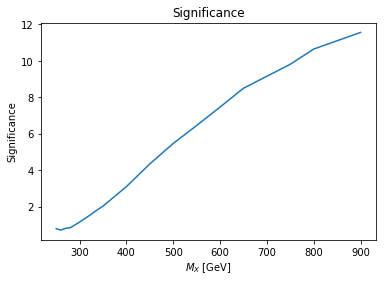

In [4]:
presel = (df.q_1 + df.q_2 == 0)

mX = np.array(Samples.Signal_Radion)
print(len(mX))
sigma = np.zeros(len(mX))

print('{:10} {:10}'.format('mX', 'sigma'))

for n in range(len(mX)):
    n_s = np.sum(df[(df.sample_id == mX[n]) & presel].weight)
    n_b = np.sum(df[(df.sample_id > 0) & presel].weight)
    sigma[n] = n_s / math.sqrt(n_s + n_b)
    #print('mX = {} GeV, sigma = {}'.format(-mX[n], sigma[n]))
    print('{:<10.2f} {:<10.2f}'.format(-mX[n], sigma[n]))

sigma_plt = plt.plot(-mX, sigma)
plt.xlabel(r'$M_X$ [GeV]')
plt.ylabel(r'Significance')
plt.title('Significance')
plt.show()

* In addition to the signal region, we should require and elliptical mass cut around the M_bb and M_tautau candidate, around 125 GeV (the measured mass of the Standard Higgs boson candidate)

mX         sigma     
250.00     0.73      
260.00     0.58      
270.00     0.58      
280.00     0.66      
300.00     1.00      
320.00     1.23      
340.00     1.56      
350.00     1.72      
400.00     2.83      
450.00     3.91      
500.00     5.24      
550.00     5.96      
600.00     7.32      
650.00     8.20      
750.00     9.57      
800.00     10.71     
900.00     11.92     


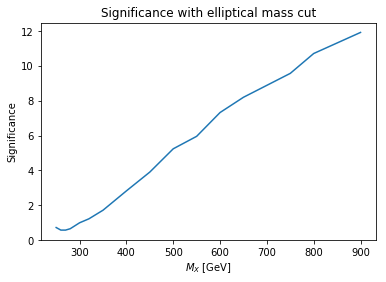

In [5]:
#repeat the exercise but adding the cut in the ellipse for m_bb and m_tautau

* As last point it should be added a different mass cut for the resonant candidate, to see how it changes the significance

mX         sigma     
250.00     1.20      
260.00     0.96      
270.00     0.96      
280.00     1.09      
300.00     1.63      
320.00     2.01      
340.00     2.51      
350.00     2.75      
400.00     4.48      
450.00     5.81      
500.00     4.44      
550.00     0.67      
600.00     0.51      
650.00     0.51      
750.00     0.35      
800.00     0.38      
900.00     0.29      


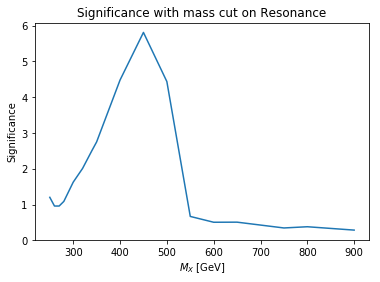

In [6]:
#repeat the exercise but adding the cut on the mass of the resonance m_X